# 箱型图和小提琴图

数据分析过程中，均值和标准差只能粗略地描述数据的集中趋势和离散程度，但不能反映数据的分布形态、偏态和峰态等特征。本讲介绍两种常用的可视化工具：箱型图（Box Plot）和小提琴图（Violin Plot）。它们能够直观地呈现中位数、25% 分位数、75% 分位数等统计量，更为全面地描述数据的分布特征和可能存在的离群值。

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir(r"D:\Github\dslian\body")  # 工作路径

## 箱线图（Boxplot）

<img style="width: 550px" src="https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/box_plots_01.png">

对于变量 $x$，我们将其中位数记为 $p50$ 或 $Q2$，第一四分位数（$p25$）和第三四分位数（$p75$）分别记为 $Q1$ 和 $Q3$。同时，其最大值和最小值分别记为 $x_{Max}$ 和 $x_{Min}$。

箱线图由箱体、胡须和异常值三部分组成。

- 箱体：
  - 箱体的上下边缘分别是数据的第一四分位数（$Q1$）和第三四分位数（$Q3$）。
  - 中间的横线表示数据的中位数（Median）。
  - 箱体的高度表示数据的四分位距（IQR），即 $IQR = Q3 - Q1$。

- 胡须：
  - 箱体的上（右）胡须延伸至 $B^H = Q3 + 1.5 \times IQR$ 的位置 (若 $x_{Max} < B^H$，则上（右）胡须延伸至 $x_{Max}$)。
  - 箱体的下（左）胡须延伸至 $B_L = Q1 - 1.5 \times IQR$ 的位置 (若 $x_{Min} > B_L$，则下（左）胡须延伸至 $x_{Min}$)。

- 异常值：
  - 异常值是指超出胡须范围的观测值，通常用圆圈表示。

此处，$1.5 \times IQR$ 是一个常用的经验值，用于判断数据的异常值。参数 1.5 取决于我们对异常值的定义，通常取值范围在 1.5 到 3 之间。取值越大，表示我们对异常值的定义越宽松。


下图展示了**箱线图结构（上图）与正态分布概率密度函数（下图）之间的对应关系**。

* **下半部分**为标准正态分布曲线，并在横轴上标注了与箱线图中 Q1、Q3 所对应的 $\pm 0.6745\sigma$ 位置。可以看到：

  * 红色区域覆盖中间的 50%，对应箱体内部；
  * 两侧蓝色区域各占 24.65%，与胡须区间一致；
  * 超出 $\pm 2.698\sigma$ 的区域仅占 0.35%，对应箱线图之外的极端值。

<img style="width: 550px" src="figs/box_plots_02.png">


## 直观感受

下面，我们模拟生成一个服从 $N(0,1)$ 分布的随机数，$N=5000$，然后分别绘制其直方图 (核密度函数图)、箱线图和小提琴图 ([查看 Codes](codes\graph_dis_box_violin_simu_Normal.ipynb))。



```dos
📊 数据分布摘要
├─ 核心趋势
│  ├─ 均值：  0.02
│  └─ 中位数：0.03
├─ 四分位距
│  ├─ Q1：-0.65
|  ├─ Q3： 0.69
│  └─ IQR：1.34 (Q3-Q1)
├─ 理论边界
│  ├─ 下限：Q1-1.5IQR = -2.66
│  └─ 上限：Q3+1.5IQR =  2.70
└─ 实际极值
   ├─ 最小值：-3.80
   └─ 最大值： 3.57
```

![](figs/graph_boxplot_violin_simu_Normal.png)





In [29]:
%reset -f

## 小提琴图

小提琴图是箱线图的扩展，除了展示数据的分布特征外，还能显示数据的密度分布。它通过在箱线图的基础上添加一个核密度估计（Kernel Density Estimation, KDE）曲线来实现。小提琴图可以更好地揭示数据的分布形态，尤其是在数据量较大时。

小提琴图的核心部分与箱线图类似，但它还包含了以下几个要素：

- **核密度估计（KDE）**：小提琴图的两侧展示了数据的密度分布，通常使用高斯核密度估计来平滑数据分布。
- **小提琴形状**：小提琴图的形状表示数据的分布特征，宽度越大表示数据在该位置的密度越高。




## 箱型图与小提琴图的对比

箱型图和小提琴图都是用于展示数据分布的可视化工具，但它们在信息传达和视觉效果上有所不同。以下是它们的主要区别：
- **信息传达**：箱型图主要关注数据的集中趋势和离散程度，而小提琴图则同时展示了数据的分布形态和密度信息。
- **视觉效果**：箱型图通常较为简洁，适合快速识别数据的基本特征；小提琴图则提供了更丰富的信息，但可能在视觉上显得复杂。
- **数据量**：在数据量较小的情况下，箱型图可能更易于理解；而在数据量较大的情况下，小提琴图能够更好地揭示数据的分布特征。

### 同时呈现多个箱线图

在实际应用中，可以同时呈现多个箱线图，以便比较不同时间段或不同资产的收益率分布特征。可以使用 `matplotlib` 的 `subplots()` 函数创建多个子图，并在每个子图上绘制箱线图。

## 模拟分析

模拟四个序列：N = 100，Python，seed = 42，分布如下： 
1. 标准正态分布
2. 左偏分布，有少量离群值 (10%)
3. 右偏分布，有少量离群值 (10%)
4. 对称分布，有大量离群值 (30%)

统计：
1. 计算四个序列：均值、标准差、min, max, p25, p50, p75, 偏度、峰度；
2. 呈现：
   - 一张表格，各列为统计量，行索引为序列名称；
   - 统计量小数点后保留一位有效数字
   - 调用必要的包，确保表格美观，统计量最好能在小数点处对齐
   
绘图：
1. 1 行 4 列的子图：呈现四个序列的箱线图
2. 1 行 4 列的子图：呈现四个序列的小提琴图
3. 图形尺寸：8x2；y_titck: 取整数，疏密有度；
4. 子图标题用中文，字体为黑体，请假在必要的库
5. 屏蔽警告信息


In [98]:
# 清空内存
%reset -f 

      Mean    SD    Min    Max    P25    P50    P75    Skew    Kurt
--  ------  ----  -----  -----  -----  -----  -----  ------  ------
x1    -0.0   0.9   -2.6    2.7   -0.7   -0.0    0.5     0.1    -0.0
x2     0.8   1.2   -3.5    4.7    0.2    0.7    1.4    -0.6     3.3
x3    -0.9   1.4   -8.2    4.0   -1.4   -0.6   -0.2    -0.5     5.1
x4    -0.0   2.0   -7.8    8.8   -0.9   -0.1    0.8    -0.1     4.6


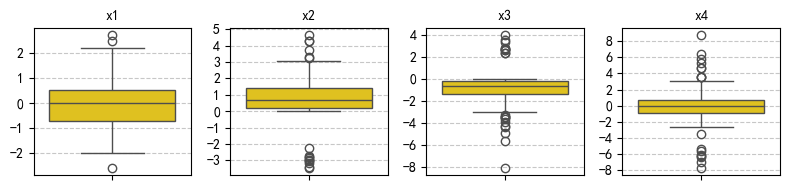

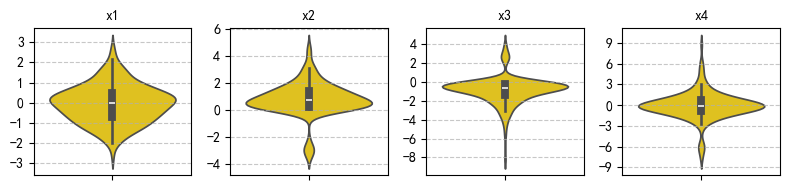

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis
from tabulate import tabulate
import matplotlib.pyplot as plt

# 屏蔽警告信息
import warnings
warnings.filterwarnings("ignore")

# 设置随机种子以确保结果可复现
np.random.seed(42)

# 模拟四个序列
N = 200
data = {
    "x1": np.random.normal(0, 1, N),
    "x2": np.concatenate([np.random.exponential(1, N - 10), np.random.normal(-3, 0.5, 10)]),
    "x3": np.concatenate([np.random.exponential(1, N - 10) * -1, np.random.normal(3, 0.5, 10)]),
    "x4": np.concatenate([np.random.normal(0, 1, N - 30), np.random.normal(0, 5, 30)])
}

# 统计计算
# 使用 numpy 计算统计量
stats = {}
for name, values in data.items():
    stats[name] = {
        "Mean": np.mean(values),
        "SD": np.std(values),
        "Min": np.min(values),
        "Max": np.max(values),
        "P25": np.percentile(values, 25),
        "P50": np.percentile(values, 50),
        "P75": np.percentile(values, 75),
        "Skew": skew(values),
        "Kurt": kurtosis(values)
    }

# 构建 DataFrame 并保留一位小数
stats_df = pd.DataFrame(stats).T.round(1)

# 使用 tabulate 美化表格输出
print(tabulate(stats_df, headers="keys", 
      stralign="right", floatfmt=".1f"))

# 绘制箱线图
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for ax, (label, values) in zip(axes, data.items()):
    sns.boxplot(y=values, ax=ax, color="gold")
    ax.set_title(label, fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

# 绘制小提琴图
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for ax, (label, values) in zip(axes, data.items()):
    sns.violinplot(y=values, ax=ax, color="gold")
    ax.set_title(label, fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## 应用实例：上证综合指数收益率年度分布

In [5]:
# 完整代码：TS_SZ_index.ipynb


# 安装必要的库（如未安装）
# !pip install plotly akshare pandas

import pandas as pd
import akshare as ak

# 获取上证指数的历史数据
sz_index = ak.stock_zh_index_daily(symbol="sh000001")  # 上证指数代码为 "sh000001"

# 重命名列名以便后续处理
sz_index.rename(columns={'date': 'day', 'close': 'close'}, inplace=True)

# 将日期列转换为 datetime 类型
sz_index['day'] = pd.to_datetime(sz_index['day'])

# 计算日收益率
sz_index['daily_return'] = sz_index['close'].pct_change()

# 提取年份列
sz_index['year'] = sz_index['day'].dt.year

# 去除 open, high, low 列
sz_index.drop(columns=['open', 'high', 'low'], inplace=True)

# Display the first 3 rows and the last 3 columns
print(sz_index.head(3))
print('-' * 50)
print(sz_index.tail(3))

         day   close  volume  daily_return  year
0 1990-12-19   99.98  126000           NaN  1990
1 1990-12-20  104.39   19700      0.044109  1990
2 1990-12-21  109.13    2800      0.045407  1990
--------------------------------------------------
            day     close       volume  daily_return  year
8391 2025-05-07  3342.665  51115960600      0.008007  2025
8392 2025-05-08  3351.996  42837776600      0.002791  2025
8393 2025-05-09  3341.999  39890919100     -0.002982  2025


接下来，我们挑选几个特定的年份，绘制其日收益率的箱型图。

注意，此处，我们使用的是 `seaborn` 库中的 `boxplot()` 函数，而不是 `matplotlib` 中的 `boxplot()` 函数。前者可以更好地处理数据的分组和分类，并且提供了更多的可视化选项。

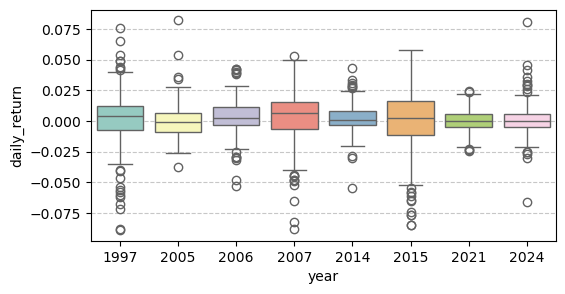

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 筛选指定年份的数据
#selected_years = [1995, 1997, 2005, 2006, 2007, 2014, 2015, 2021, 2024]
selected_years = [1997, 2005, 2006, 2007, 2014, 2015, 2021, 2024]
filtered_data = sz_index[sz_index['year'].isin(selected_years)]

# 绘制多个年度的箱型图
plt.figure(figsize=(6, 3))
sns.boxplot(x='year', y='daily_return', 
            data=filtered_data, palette='Set3')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


该图为**多个特定年份的深证成指日收益率的箱线图**，涵盖了 1997、2005、2006、2007、2014、2015、2021 和 2024 年等八个代表性年份，展示了每年交易日中日收益率的分布情况。

从**中位数线**（箱体中间的横线）来看：

- 中位数大于零。1997年、2006 年、2007 年和 2015 年的中位收益率明显高于零，说明这些年份中有**超过一半的交易日呈现正收益**，整体市场偏强。
- 中位数接近于零。2014 年、2021 年和 2024 年中位数趋近于零，意味着正负收益天数接近持平。
- 中位数小于零。2005 年中位收益率低于零，表明该年中**大部分交易日处于负收益区间**，市场情绪低迷。

从箱体的**高度** (即 $IQR = Q3 - Q1$) 和**胡须长度**来看：
- 箱体高度较高，胡须较长。1997 年、2007 年和 2015 年的箱体高度较高，且胡须较长，表明这几年的年内收益波动性较大，市场情绪起伏明显。
- 箱体高度较低，胡须较短。2021 年的箱体很低，胡须也很短，上下胡须外侧的离群值也很少。可以推断，该年是一个大熊市，市场情绪低迷，整体波动性较小。

从**离群点**来看：
- 1997 年的箱型图中，上下胡须外侧的离群值点都比较多，说明当年市场波动剧烈，存在较多极端收益的交易日 (如果你绘制 1995 年以前的箱线图，会发现波动更为剧烈，当时没有 10% 日内涨跌幅限制，市场波动性更大)。
- 2007 年和 2015 年的分布特征非常相似，都是在下胡须方向上有较多的离群点，说明存在较多单日大幅下跌的情况。

## 特定年份分析：

* **2005 年 vs 2006 年**：

  * 2005 年的箱体整体较低，中位数为负，且上胡须较短，反映当年大部分交易日处于负收益区间，市场情绪低迷。
  * 2006 年则大为反转，中位数跃升至零之上，箱体明显上移，收益分布更偏向正区间，显示出市场在牛市初期的积极走势。这一变化与当年“股权分置改革推进、人民币升值预期增强”等政策背景密切相关。

* **2024 年**：

  * 箱体高度极窄，即 Q75 与 Q25 非常接近，说明日收益率的**四分位间距（IQR）很小**，波动性低；
  * 同时，存在较多离群点分布在上下两侧，提示虽然整体震荡区间狭窄，但**偶发性的大涨或大跌依然存在**，这可能与 AI、芯片等概念股轮动剧烈，但整体指数运行平稳有关。



下图呈现了几个特定年份的沪市综合指数的时序图 ([codes](https://github.com/arlionn/dslian/blob/main/body/codes/graph_sz_index_selected_years.ipynb))，大家可以挑选一些年份，将其收盘价的时序图与上图中对应年份的箱型图进行对比，以便更深入地理解箱型图的含义。

![](figs/sz_index_daily_return_selected_years.png)

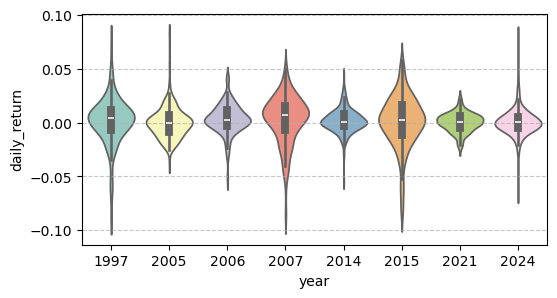

In [7]:

# 绘制小提琴图
plt.figure(figsize=(6, 3))
sns.violinplot(x='year', y='daily_return', 
               data=filtered_data, palette='Set3')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

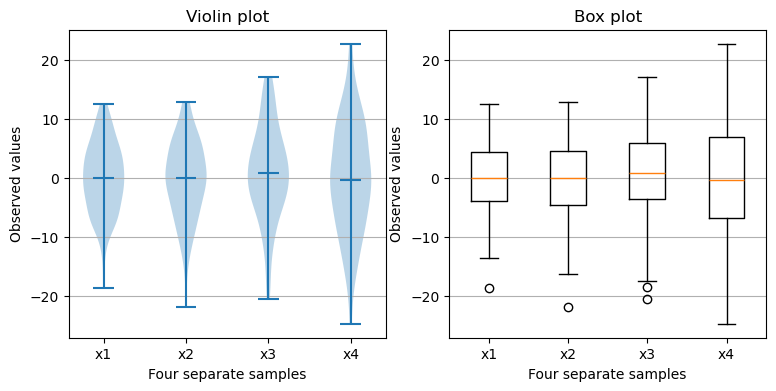

In [8]:
# https://matplotlib.org/stable/gallery/statistics/boxplot_vs_violin.html

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

### Add Jitter
By adding a stripplot, you can show all observations along with some representation of the underlying distribution.

> Source: [Hidden Data Under Boxplot](https://python-graph-gallery.com/39-hidden-data-under-boxplot/)

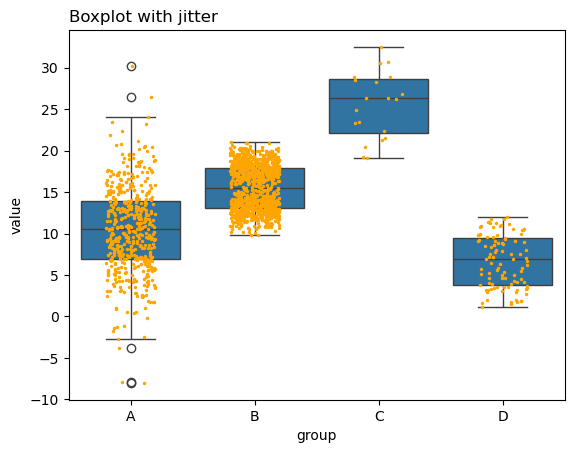

In [9]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df = pd.concat([a,b,c,d,e])

# boxplot
ax = sns.boxplot(x='group', y='value', data=df)
# add stripplot
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()


## 小提琴图：两个组别

- [seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

<Axes: xlabel='age', ylabel='age'>

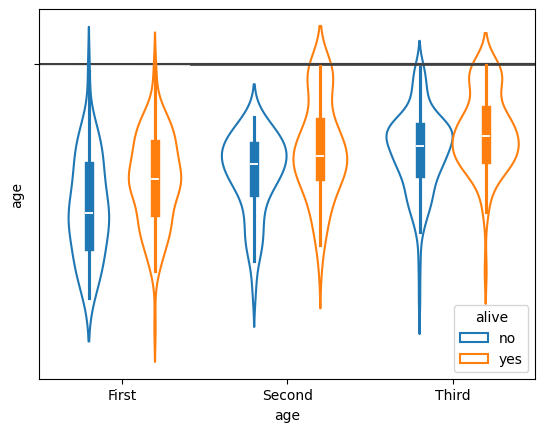

In [10]:
import seaborn as sns

df = sns.load_dataset("titanic")
sns.violinplot(x=df["age"])
sns.violinplot(data=df, x="class", y="age", hue="alive", fill=False)

<Axes: xlabel='class', ylabel='age'>

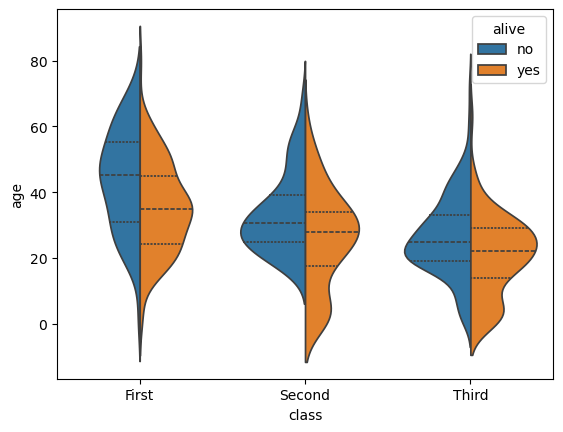

In [2]:
sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")

## 参考资料

- [Matplotlib Documentation](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html)
- [Seaborn Documentation](https://seaborn.pydata.org/tutorial/axis_grids.html)
- [Seaborn Boxplot](https://seaborn.pydata.org/tutorial/boxplot.html)
- [Seaborn Violinplot](https://seaborn.pydata.org/tutorial/violinplot.html)
- [Seaborn Boxplot and Violinplot](https://seaborn.pydata.org/tutorial/boxplot.html#boxplot-and-violinplot)
- [Seaborn - Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html)
- [Boxplot and Violinplot](https://towardsdatascience.com/boxplot-and-violinplot-in-python-using-seaborn-4f1a2b8c3d7e)

